In [55]:
import pickle
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot  as plt
import FinanceDataReader as fdr
import warnings
from datetime import datetime, timedelta

warnings.filterwarnings(action='ignore')

In [56]:
# 확인하면 되는 것들
std_date = '20211101'
N = 1000

DATA_PATH = f'./db_and_model/stock_data_{std_date}_{N}.csv'

In [57]:
def date_add(date, month):
    '''date에 month만큼 더해준다. date는 20210102와 같은 꼴이나 datetime type으로 입력한다.'''
    if type(date) == str: # date가 datetime이 아니라 str 타입으로 들어온 경우
        date = datetime.strptime(date, '%Y%m%d')
    delta = timedelta(days=month*30.5)
    return date + delta

def earning_rate(stock_price : list, start_date, end_date):
    '''start_date부터 end_date까지 stock_price데이터를 가지고 수익률을 구해주는 함수(종가 기준)'''
    possible_start_date = stock_price[stock_price.index >= start_date].index[0]
    possible_end_date = stock_price[stock_price.index <= end_date].index[-1]
    
    start_price = stock_price.loc[possible_start_date].Close
    end_price = stock_price.loc[possible_end_date].Close
    
    return (end_price - start_price) / start_price

def preprocess(data_path):
    """데이터 불러오기 + 전처리"""
    # raw_data = pd.read_csv(data_path, encoding='cp949')
    raw_data = pd.read_csv(data_path)
    raw_data.drop(raw_data[raw_data['PER'] == 0].index, inplace=True) # PER 0인 종목 제외
    raw_data.drop(raw_data[raw_data['PBR'] == 0].index, inplace=True) # PBR 0인 종목 제외

    return raw_data.reset_index()

def pred(data_path=DATA_PATH):
    raw_data = preprocess(data_path)

    col_names = ["12개월 간 수익률", "KOSPI대비 12개월 간 수익률" , "12개월 간 KOSPI 이김" , 'PER_inv' , 'PBR_inv' , "배당수익률"]
    X = raw_data[col_names]

    # MODEL_FILEPATH = './db_and_model/stock_pred_model.pkl'
    # MODEL_FILEPATH = './db_and_model/Seasonal(Novemver_to_April)_Stock_Pred_Model(20221030).pkl'
    MODEL_FILEPATH = './db_and_model/Seasonal(Novemver_to_April)_Stock_Pred_Model_for_evaluation(-201911).pkl'

    with open(MODEL_FILEPATH, 'rb') as pickle_file:
        stock_pred_model = pickle.load(pickle_file)

    y = stock_pred_model.predict_proba(X)[:, 1]
    y = pd.DataFrame(y, columns=['y'])

    # 결과 dataFrame
    res = raw_data.copy()
    res['y'] = y.values

    return res

res = pred()

top_stocks = res.sort_values(by='y', ascending=False).head(50)

top_stocks[['name', 'PER', 'PBR', '12개월 간 수익률', 'y']].reset_index(drop=True)

,name,PER,PBR,12개월 간 수익률,y
0,삼보판지,6.34,0.59,0.688235,0.717428
1,보광산업,35.02,3.89,0.286822,0.716220
2,금호석유우,10000.00,10000.00,1.072937,0.711222
3,팜스코,17.21,0.76,0.325380,0.708043
4,LG화학,124.81,3.61,0.335474,0.706138
5,두산우,10000.00,10000.00,0.890026,0.701230
6,롯데쇼핑,10000.00,0.32,0.277713,0.698592
7,한화손해보험,14.14,0.31,0.571429,0.694020
8,태림포장,97.33,0.96,-0.177800,0.688792
9,피에이치에이,30.76,0.42,0.537958,0.688446


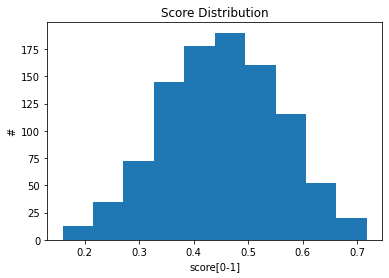

In [58]:
fig = plt.figure()
plt.hist(res['y'])
plt.title('Score Distribution')
plt.xlabel('score[0-1]')
plt.ylabel('#')
plt.show()

In [65]:
# 상위 종목
top_stocks = res.sort_values(by='y', ascending=False).head(50)

end_date = date_add(date=std_date, month=6) # std_date에 month 이후

stock_price_dic = {}

for code in top_stocks.code:
    stock_price_dic[code] = fdr.DataReader(code, start=std_date)

er_list = []
for code in top_stocks.code:
    er = earning_rate(stock_price_dic[code], start_date=std_date, end_date=end_date)
    er_list.append(er)

top_stocks['수익률'] = er_list

print('수익률 : {:.4f}%'.format(top_stocks['수익률'].mean()*100))
top_stocks.head(50)

수익률 : -3.1484%


,index,Unnamed: 0,date,code,12개월 간 수익률,name,KOSPI 12개월 간 수익률,KOSPI대비 12개월 간 수익률,12개월 간 KOSPI 이김,PER,PBR,배당수익률,PER_inv,PBR_inv,y,수익률
930,950,950,20211101,023600,0.688235,삼보판지,0.295101,0.393134,1,6.34,0.59,0.87,0.157729,1.694915,0.717428,-0.048780
754,773,773,20211101,225530,0.286822,보광산업,0.295101,-0.008280,0,35.02,3.89,1.20,0.028555,0.257069,0.716220,-0.033735
711,730,730,20211101,011785,1.072937,금호석유우,0.295101,0.777835,1,10000.00,10000.00,3.94,0.000100,0.000100,0.711222,-0.123148
959,979,979,20211101,036580,0.325380,팜스코,0.295101,0.030278,1,17.21,0.76,1.64,0.058106,1.315789,0.708043,0.216039
3,3,3,20211101,051910,0.335474,LG화학,0.295101,0.040372,1,124.81,3.61,1.20,0.008012,0.277008,0.706138,-0.378606
769,788,788,20211101,000155,0.890026,두산우,0.295101,0.594924,1,10000.00,10000.00,2.77,0.000100,0.000100,0.701230,0.006766
116,117,117,20211101,023530,0.277713,롯데쇼핑,0.295101,-0.017388,0,10000.00,0.32,2.56,0.000100,3.125000,0.698592,-0.138813
480,489,489,20211101,000370,0.571429,한화손해보험,0.295101,0.276327,1,14.14,0.31,0.00,0.070721,3.225806,0.694020,0.053872
767,786,786,20211101,011280,-0.177800,태림포장,0.295101,-0.472901,0,97.33,0.96,0.00,0.010274,1.041667,0.688792,0.041816
896,916,916,20211101,043370,0.537958,피에이치에이,0.295101,0.242857,1,30.76,0.42,1.53,0.032510,2.380952,0.688446,-0.217872


In [66]:
top_stocks[['name', 'KOSPI대비 12개월 간 수익률', 'PER', 'PBR', 'y', '수익률']]

,name,KOSPI대비 12개월 간 수익률,PER,PBR,y,수익률
930,삼보판지,0.393134,6.34,0.59,0.717428,-0.048780
754,보광산업,-0.008280,35.02,3.89,0.716220,-0.033735
711,금호석유우,0.777835,10000.00,10000.00,0.711222,-0.123148
959,팜스코,0.030278,17.21,0.76,0.708043,0.216039
3,LG화학,0.040372,124.81,3.61,0.706138,-0.378606
769,두산우,0.594924,10000.00,10000.00,0.701230,0.006766
116,롯데쇼핑,-0.017388,10000.00,0.32,0.698592,-0.138813
480,한화손해보험,0.276327,14.14,0.31,0.694020,0.053872
767,태림포장,-0.472901,97.33,0.96,0.688792,0.041816
896,피에이치에이,0.242857,30.76,0.42,0.688446,-0.217872


In [54]:
# 하위 종목
top_stocks = res.sort_values(by='y', ascending=False).tail(50)

end_date = date_add(date=std_date, month=6) # std_date에 month 이후

stock_price_dic = {}

for code in top_stocks.code:
    stock_price_dic[code] = fdr.DataReader(code, start=std_date)

er_list = []
for code in top_stocks.code:
    er = earning_rate(stock_price_dic[code], start_date=std_date, end_date=end_date)
    er_list.append(er)

top_stocks['수익률'] = er_list

print('수익률 : {:.4f}%'.format(top_stocks['수익률'].mean()*100))
top_stocks.head(50)

수익률 : -12.7326%


,index,Unnamed: 0,date,code,12개월 간 수익률,name,KOSPI 12개월 간 수익률,KOSPI대비 12개월 간 수익률,12개월 간 KOSPI 이김,PER,PBR,배당수익률,PER_inv,PBR_inv,y,수익률
335,343,343,20211101,218410,-0.104464,RFHIC,0.295101,-0.399566,0,366.87,3.78,0.33,0.002726,0.264550,0.275116,-0.057471
627,642,642,20211101,099430,-0.171032,바이오플러스,0.295101,-0.466134,0,69.15,11.77,0.00,0.014461,0.084962,0.272179,0.003717
664,679,679,20211101,282880,0.999782,코윈테크,0.295101,0.704680,1,136.59,3.59,0.53,0.007321,0.278552,0.271105,-0.143107
717,736,736,20211101,107590,1.302632,미원홀딩스,0.295101,1.007530,1,18.53,2.00,0.36,0.053967,0.500000,0.270366,-0.014286
906,926,926,20211101,352480,-0.124340,씨앤씨인터내셔널,0.295101,-0.419441,0,18.49,4.46,1.63,0.054083,0.224215,0.270030,0.024948
345,353,353,20211101,290650,-0.189977,엘앤씨바이오,0.295101,-0.485078,0,70.34,13.15,0.14,0.014217,0.076046,0.269573,0.139568
98,99,99,20211101,006360,0.505396,GS건설,0.295101,0.210294,1,10.68,0.82,2.87,0.093633,1.219512,0.269138,0.001195
143,144,144,20211101,271940,-0.222222,일진하이솔루스,0.295101,-0.517323,0,129.29,37.83,0.00,0.007735,0.026434,0.268137,-0.411255
197,198,198,20211101,000240,0.106667,한국앤컴퍼니,0.295101,-0.188435,0,8.98,0.46,3.01,0.111359,2.173913,0.267305,-0.132530
920,940,940,20211101,294140,-0.517110,레몬,0.295101,-0.812212,0,17.26,3.64,0.00,0.057937,0.274725,0.263772,-0.296850


In [6]:
# 금융주, 지주 회사 제외 테스트
condition = ~(res.name.str.contains('지주') | res.name.str.contains('홀딩스')
    | res.name.str.contains('은행') | res.name.str.contains('금융') | res.name.str.contains('보험')
     | res.name.str.contains('증권') | res.name.str.contains('생명'))

top_stocks2 = res[condition].sort_values(by='y', ascending=False).head(50)

end_date = date_add(date=std_date, month=6) # std_date에 month 이후

stock_price_dic = {}

for code in top_stocks2.code:
    stock_price_dic[code] = fdr.DataReader(code, start=std_date)

er_list = []
for code in top_stocks2.code:
    er = earning_rate(stock_price_dic[code], start_date=std_date, end_date=end_date)
    er_list.append(er)

top_stocks2['수익률'] = er_list

print('수익률 : {:.4f}%'.format(top_stocks2['수익률'].mean()*100))
top_stocks2.head(50)

수익률 : 0.0000%


,index,Unnamed: 0,date,code,12개월 간 수익률,name,KOSPI 12개월 간 수익률,KOSPI대비 12개월 간 수익률,12개월 간 KOSPI 이김,PER,PBR,배당수익률,PER_inv,PBR_inv,y,수익률
956,977,977,20221018,019440,0.184848,세아특수강,-0.251683,0.436531,1,6.25,0.50,6.14,0.160000,2.000000,0.814528,0.0
97,98,98,20221018,001450,0.153982,현대해상,-0.251683,0.405665,1,6.17,0.51,4.54,0.162075,1.960784,0.814349,0.0
741,757,757,20221018,010955,-0.120556,S-Oil우,-0.251683,0.131127,1,10000.00,10000.00,6.72,0.000100,0.000100,0.798650,0.0
389,395,395,20221018,000815,-0.135734,삼성화재우,-0.251683,0.115949,1,10000.00,10000.00,7.70,0.000100,0.000100,0.784290,0.0
35,35,35,20221018,030200,0.134185,KT,-0.251683,0.385868,1,6.16,0.56,5.38,0.162338,1.785714,0.781584,0.0
242,245,245,20221018,003690,-0.255767,코리안리,-0.251683,-0.004084,0,5.21,0.30,7.08,0.191939,3.333333,0.775205,0.0
816,834,834,20221018,008060,-0.165301,대덕,-0.251683,0.086382,1,10000.00,0.36,4.91,0.000100,2.777778,0.770841,0.0
913,933,933,20221018,004560,-0.355978,현대비앤지스틸,-0.251683,-0.104295,0,2.58,0.36,0.84,0.387597,2.777778,0.765123,0.0
99,100,100,20221018,005387,-0.210000,현대차2우B,-0.251683,0.041683,1,10000.00,10000.00,6.46,0.000100,0.000100,0.762878,0.0
139,140,140,20221018,005385,-0.208417,현대차우,-0.251683,0.043266,1,10000.00,10000.00,6.39,0.000100,0.000100,0.761342,0.0


-1.9805692009306781

수익률 : -1.9806%
